<b>Insurance Charges Prediction</b>
<p>
The data contains medical costs of people characterized by certain attributes. We can dive deep into this data to find some valuable insights of the charges for insurance.

</p>

<b>Objective</b>
<p>
We will try to build a machine learning model to accurately predict the charges for insurance of a patient given age , ses,bmi, number of children, smoker and region.
</p>

<b>Data</b>
<p>
The datasets consists of several medical predictor variables and one target variable, Charges. Predictor variables includes the following
<p>

<b>Age</b>age of primary beneficiary
<p><b>Sex:</b> Insurance contractor gender, female, male
<p><b>BMI:</b> Body mass index, providing an understanding of body, weights that are relatively high or low
relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight,
ideally 18.5 to 24.9
<p><b>Children/Dependents:</b> Number of children covered by health insurance / Number of dependents
<p><b>Smoker:</b> Person who smokes or not
<p><b>Region:</b>The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
<p><b>Charges:</b> Individual medical costs billed by health insurance


In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
insurance = pd.read_csv('insurance.csv')

insurance


age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  39.820         0     no  southeast  11090.71780
14     27    male  42.130         0    yes  southeast  39611.75770
15     19    male  24.600         1     no  southwest   1837.23700
16     52  female  30.780         1     no  northeast  10797.33620
17     23    male  23.845         0     no  northeast   2395.17155
18     56    male  40.300         0     no  southwest  10602.38500
19     30    male  35.300         0    yes  southwest  36837.46700
20     60  female  36.005         0     no  northeast  13228.84695
21     30  female  32.400         1     no  southwest   4149.73600
22     18    male  34.100         0     no  southeast   1137.01100
23     34  female  31.920         1    yes  northeast  37701.87680
24     37    male  28.025         2     no  northwest   6203.90175
25     59  female  27.720         3     no  southeast  14001.13380
26     63  female  23.085         0     no  northeast  14451.83515
27     55  female  32.775         2     no  northwest  12268.63225
28     23    male  17.385         1     no  northwest   2775.19215
29     31    male  36.300         2    yes  southwest  38711.00000
...   ...     ...     ...       ...    ...        ...          ...
1308   25  female  30.200         0    yes  southwest  33900.65300
1309   41    male  32.200         2     no  southwest   6875.96100
1310   42    male  26.315         1     no  northwest   6940.90985
1311   33  female  26.695         0     no  northwest   4571.41305
1312   34    male  42.900         1     no  southwest   4536.25900
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1315   18    male  28.310         1     no  northeast  11272.33139
1316   19  female  20.600         0     no  southwest   1731.67700
1317   18    male  53.130         0     no  southeast   1163.46270
1318   35    male  39.710         4     no  northeast  19496.71917
1319   39  female  26.315         2     no  northwest   7201.70085
1320   31    male  31.065         3     no  northwest   5425.02335
1321   62    male  26.695         0    yes  northeast  28101.33305
1322   62    male  38.830         0     no  southeast  12981.34570
1323   42  female  40.370         2    yes  southeast  43896.37630
1324   31    male  25.935         1     no  northwest   4239.89265
1325   61    male  33.535         0     no  northeast  13143.33665
1326   42  female  32.870         0     no  northeast   7050.02130
1327   51    male  30.030         1     no  southeast   9377.90470
1328   23  female  24.225         2     no  northeast  22395.74424
1329   52    male  38.600         2     no  southwest  10325.20600
1330   57  female  25.740         2     no  southeast  12629.16560
1331   23  female  33.400         0     no  southwest  10795.93733
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast

<b>First 5 samples</b>

In [2]:

first = insurance.head()
first

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

<b>Last 5 samples</b>

In [3]:
last = insurance.tail()
last

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

<b>Summary/Quick overview of the Dataset<b>

In [4]:

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


<b>Insurance Shape</b>

In [5]:
insurance.shape

(1338, 7)

<b>Point Five Summary</b>

In [6]:
insurance.describe()


age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [7]:
insurance.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
insurance.apply(lambda x:sum(x.isnull()))


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<b>Data Visualization</b>

<b>Distribution of Male and Female </b>


In [9]:
#display how many males and females are there
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

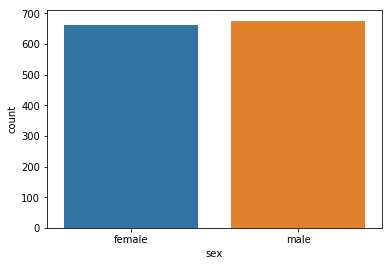

In [10]:


#display graphically how many males and females are there
sns.countplot(insurance['sex'])
plt.show()

<b>Distribution of children</b>

In [11]:
#display the count of children
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

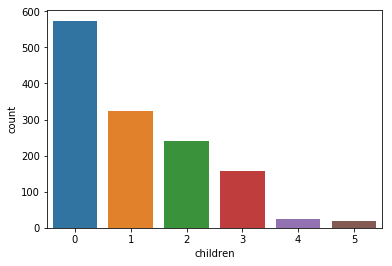

In [12]:
sns.countplot(insurance['children'])
plt.show()

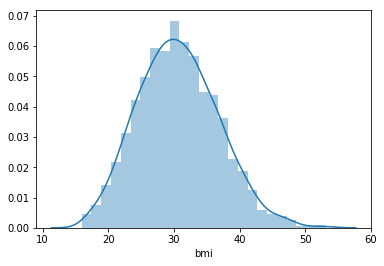

In [13]:
#display graphically the distribution of bmi column
sns.distplot(insurance['bmi'])
plt.show()


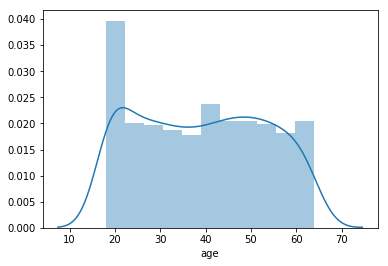

In [14]:
#display graphically the distribution of age column
sns.distplot(insurance['age'])
plt.show()


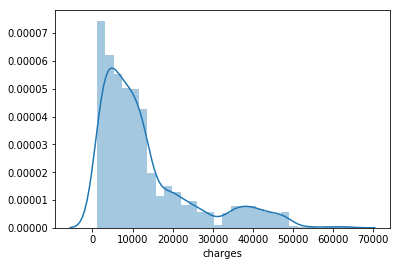

In [15]:
#display graphically the distribution of charges column
sns.distplot(insurance['charges'])
plt.show()


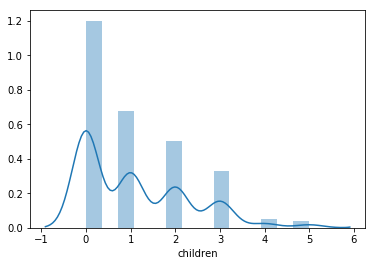

In [16]:
#display graphically the distribution of charges column
sns.distplot(insurance['children'])
plt.show()



From the above graph we can see that children is right skewed as long tail is at the right side

<b>Skewness of Age, BMI , Charges</b>

In [17]:
#display the skewness of each column
pd.DataFrame([stats.skew(insurance['age']),stats.skew(insurance['bmi']),stats.skew(insurance['charges'])],index=['age','bmi','charges'],columns=['skewness'])

skewness
age      0.055610
bmi      0.283729
charges  1.514180

We can see that charges has high skewness and age has less skewness

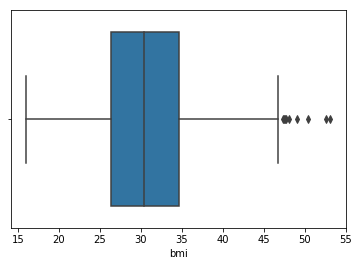

In [18]:
#check any outliers are there in bmi column
sns.boxplot(x='bmi',data=insurance)
plt.show()

We can see that there are outliers in the BMI column

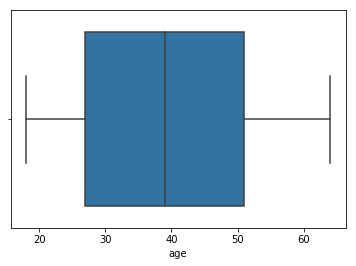

In [19]:
#check any outliers are there in bmi column
sns.boxplot(x='age',data=insurance)
plt.show()

We can see that there are no outliers for Age colum

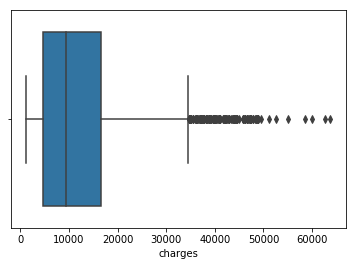

In [20]:
#check any outliers are there in bmi column
sns.boxplot(x='charges',data=insurance)
plt.show()

We can see that there are outliers for Charges column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261EBE0EE10>,
      dtype=object)

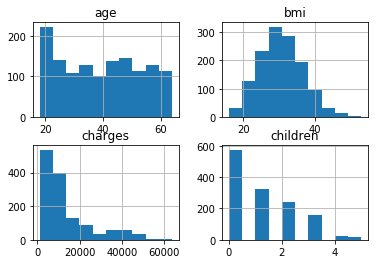

In [21]:

insurance.hist()


<b>Pair Plot for Attribute Smoker</b>

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

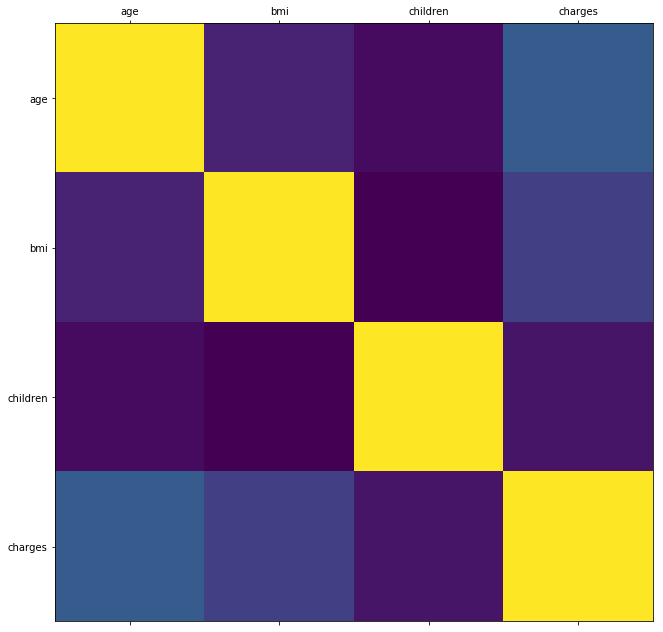

In [33]:
corr = insurance.corr() # calling the correlation function on the datafrmae
fig, ax = plt.subplots(figsize=(11,11))
ax.matshow(corr) # color code the rectangles by correlation value
plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks
corr

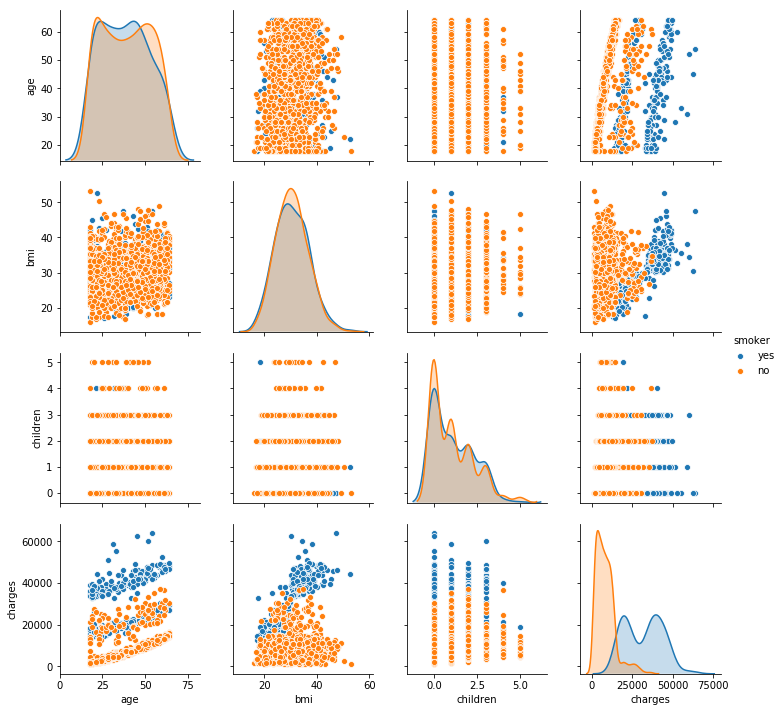

In [22]:

sns.pairplot(insurance,hue='smoker')
plt.show()

<b>Pair plot for Attribute Sex</b>

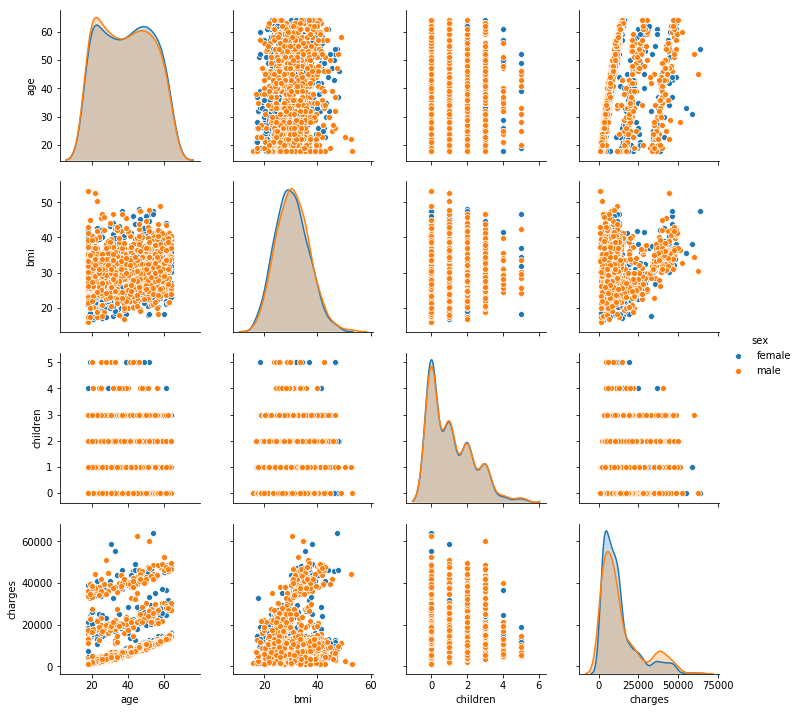

In [23]:
 
sns.pairplot(insurance,hue='sex')
plt.show()

<b>Do charges of people who smoke differ significantly from the people who don't?</b>

In [24]:
#Null Hypothesis--> H0 = "smoking has no effect on insurance charges"
#Alternate hypothesis--> H1 = "smoking has effect on insurance charges" 

x = np.array(insurance[insurance['smoker'] == 'yes']['charges'])#selecting charges values corresponding to smoker 
y = np.array(insurance[insurance['smoker'] == 'no']['charges'])#selecting charges values corresponding to non smoker 
t,p_value = stats.ttest_ind(x,y,axis =0)#performing an independent T-test
if p_value <0.05:
    print("Smoking has effect on insurance charges(reject H0)")
else:
    print("Smoking has no effect on insurance charges(accept H0)")

Smoking has effect on insurance charges(reject H0)


<b>Does bmi of males differ significantly from that of females?</b>

In [25]:
#Null Hypothesis--> H0 = "bmi has no effect on gender"
#Alternate hypothesis--> H1 = "bmi has effect on gender" 

x = np.array(insurance[insurance['sex'] == 'male']['bmi'])#selecting bmi values corresponding to male
y = np.array(insurance[insurance['sex'] == 'female']['bmi'])#selecting bmi values corresponding to female 
t,p_value = stats.ttest_ind(x,y,axis =0)#performing an independent T-test
if p_value <0.05:
    print("BMI has effect on gender(reject H0)")
else:
    print("BMI has no effect on gender(accept H0)")

BMI has no effect on gender(accept H0)


<b>Is the proportion of smokers significantly different in different genders?</b>
<p>Chi-square Test can be used in this case</p>

In [26]:
pd.crosstab(insurance['smoker'],insurance['sex'])

sex     female  male
smoker              
no         547   517
yes        115   159

In [27]:
#Null Hypothesis--> H0 = "There is no difference in proportion of smokers in different genders"
#Alternate hypothesis--> H1 = "There is difference in proportion of smokers in different genders" 

# We can see from the above table that 547 females are not smoker and 115 females are smoker
#like wise 517 males are not smoker and 159 males are smoker

#E11= expected value of smoker=no and sex=female
#E12 = expected value of smoker=no and sex= male
#E21 = expected value of smoker=yes and sex= female
#E22 = expected value of smoker=yes and sex= male

# Expected Value = RowCount*ColumnCount/TotalCount

E11 = 1064*(662/1338)
print("Expected value of smoker=no and sex=female is {}".format(E11))
E12 = 1064*(676/1338)
print("Expected value of smoker=no and sex= male is {}".format(E12))
E21 = 274*(662/1338)
print("Expected value of smoker=yes and sex= female is {}".format(E21))
E22 = 274*(676/1338)
print("Expected value of smoker=yes and sex= male is {}".format(E22))

#chi-square = summation((observed-expected)^2/expected)
chiE11 = np.square(547-E11)/E11
print("ChiSquare of E11 is {}".format(chiE11))
chiE12 = np.square(517-E12)/E12
print("ChiSquare of E12 is {}".format(chiE12))
chiE21 = np.square(115-E21)/E21
print("ChiSquare of E21 is {}".format(chiE21))
chiE22 = np.square(159-E22)/E22
print("ChiSquare of E22 is {}".format(chiE22))

chisquare = chiE11+chiE12+chiE21+chiE22
print("Final Chi-Square is {}".format(chisquare))

degree_of_freedom = (2-1)*(2-1)
print("Degree of Dreedom is {}".format(degree_of_freedom))

#having calculated the chi square value and degree of freedom ,we consult a chi-square
#table to check whether the chi square statistics of 7.76 exceeds the critical value
#of the chi square distribution, The critical value for alpha of 0.05(95% confidence) is 3.84
#since the statistics is much larger than 3.84, we have sufficient evidence to reject the H0(null hypothesis)

if chisquare<3.84:
    print("There is no difference in proportion of smokers in different genders(accept H0)")
else:
    print("There is difference in proportion of smokers in different genders(reject H0)")

Expected value of smoker=no and sex=female is 526.4334828101644
Expected value of smoker=no and sex= male is 537.5665171898356
Expected value of smoker=yes and sex= female is 135.56651718983557
Expected value of smoker=yes and sex= male is 138.43348281016443
ChiSquare of E11 is 0.8034854224352866
ChiSquare of E12 is 0.7868451917931356
ChiSquare of E21 is 3.120103976172045
ChiSquare of E22 is 3.0554864382039844
Final Chi-Square is 7.765921028604452
Degree of Dreedom is 1
There is difference in proportion of smokers in different genders(reject H0)


In [28]:
#Null Hypothesis--> H0 = "The distribution of bmi across women with no children,one child and two children is not same"
#Alternate hypothesis--> H1 = "The distribution of bmi across women with no children,one child and two children is same"

#make the data frame of females having children less than or equal to 2

df = insurance[(insurance['children']<=2) & (insurance['sex']=='female')]
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
9      60  female  25.840         0     no  northwest  28923.13692
11     62  female  26.290         0    yes  southeast  27808.72510
13     56  female  39.820         0     no  southeast  11090.71780
16     52  female  30.780         1     no  northeast  10797.33620
20     60  female  36.005         0     no  northeast  13228.84695
21     30  female  32.400         1     no  southwest   4149.73600
23     34  female  31.920         1    yes  northeast  37701.87680
26     63  female  23.085         0     no  northeast  14451.83515
27     55  female  32.775         2     no  northwest  12268.63225
31     18  female  26.315         0     no  northeast   2198.18985
40     24  female  26.600         0     no  northeast   3046.06200
41     31  female  36.630         2     no  southeast   4949.75870
43     37  female  30.800         2     no  southeast   6313.75900
46     18  female  38.665         2     no  northeast   3393.35635
47     28  female  34.770         0     no  northwest   3556.92230
48     60  female  24.530         0     no  southeast  12629.89670
50     18  female  35.625         0     no  northeast   2211.13075
51     21  female  33.630         2     no  northwest   3579.82870
56     58  female  31.825         2     no  northeast  13607.36875
58     53  female  22.880         1    yes  southeast  23244.79020
59     34  female  37.335         2     no  northwest   5989.52365
63     28  female  25.935         1     no  northwest   4133.64165
64     20  female  22.420         0    yes  northwest  14711.74380
65     19  female  28.900         0     no  southwest   1743.21400
66     61  female  39.100         2     no  southwest  14235.07200
68     40  female  36.190         0     no  southeast   5920.10410
70     27  female  24.750         0    yes  southeast  16577.77950
...   ...     ...     ...       ...    ...        ...          ...
1271   25  female  34.485         0     no  northwest   3021.80915
1276   22  female  30.400         0     no  northeast   2741.94800
1277   32  female  29.735         0     no  northwest   4357.04365
1279   25  female  26.790         2     no  northwest   4189.11310
1280   48  female  33.330         0     no  southeast   8283.68070
1281   47  female  27.645         2    yes  northwest  24535.69855
1282   18  female  21.660         0    yes  northeast  14283.45940
1285   47  female  24.320         0     no  northeast   8534.67180
1286   28  female  17.290         0     no  northeast   3732.62510
1287   36  female  25.900         1     no  southwest   5472.44900
1290   38  female  19.950         2     no  northeast   7133.90250
1297   28  female  26.510         2     no  southeast   4340.44090
1299   19  female  25.745         1     no  northwest   2710.82855
1302   25  female  20.800         1     no  southwest   3208.78700
1305   24  female  27.720         0     no  southeast   2464.61880
1306   29  female  21.850         0    yes  northeast  16115.30450
1308   25  female  30.200         0    yes  southwest  33900.65300
1311   33  female  26.695         0     no  northwest   4571.41305
1313   19  female  34.700         2    yes  southwest  36397.57600
1316   19  female  20.600         0     no  southwest   1731.67700
1319   39  female  26.315         2     no  northwest   7201.70085
1323   42  female  40.370         2    yes  southeast  43896.37630
1326   42  female  32.870         0     no  northeast   7050.02130
1328   23  female  24.225         2     no  northeast  22395.74424
1330   57  female  25.740         2     no  southeast  12629.16560
1331   23  female  33.400         0     no  southwest  10795.93733
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast

In [29]:
stats.f_oneway(df['bmi'][df['children'] == 0], 
             df['bmi'][df['children'] == 1],
             df['bmi'][df['children'] == 2])

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [30]:
results = ols('bmi ~ C(children)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3345
Date:                Sun, 14 Jul 2019   Prob (F-statistic):              0.716
Time:                        22:22:44   Log-Likelihood:                -1821.7
No. Observations:                 566   AIC:                             3649.
Df Residuals:                     563   BIC:                             3662.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.3615      0.357     85.131      0.000      29.661      31.062
C(children)[T.1]    -0.3089      0.600     -0.515      0.607      -1.487       0.869
C(children)[T.2]     0.2883      0.660      0.437      0.663      -1.009       1.585
==============================================================================
Omnibus:                        6.792   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.671
Skew:                           0.234   Prob(JB):                       0.0356
Kurtosis:                       2.747   Cond. No.                         3.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

sum_sq     df         F    PR(>F)
C(children)     24.590123    2.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN

<p>We can see that p_value is 0.71 which means that the distribution of bmi across women with no children,one child and two children is same
and we reject H0(Null Hypothesis)</p>

<b>Summary</b>
<p>There are 1338 samples with 7 different attributes with the charges as the target variable for Insurance.
    Out of 1338, 676 are male  and 662 are female.
<p>BMI and Charges have outliers and Age does not have outliers.
<p>With the Alternate hypothesis, we saw that smoking has an influence on insurance charges of people significantly from the people who don't smoke.
<p>With the Null hypothesis, we saw that bmi has no effect on gender</p>
<p>With Chi-Square Test, we saw that there is difference in proportion of smokers in different genders   
<p>With ANOVA Test , we saw that the distribution of bmi across women with no children,one child and two children is same    
